<a href="https://colab.research.google.com/github/Akita20/Practice/blob/master/Copy_of_Understanding_Optimization_Algorithms_in_Deep_Learning_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Optimization Algorithms in Deep Learning





- <small>[![LinkedIn](https://img.shields.io/badge/LinkedIn-Connect-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/alokyadavonline/)</small>
- <small>[![YouTube](https://img.shields.io/badge/YouTube-Subscribe-red?style=for-the-badge&logo=youtube)](https://youtube.com/@AlokYadavonline?si=rk9LORGLTujPjqOE)</small>

<small>Click the "LinkedIn" and "YouTube" badges above to connect with me on LinkedIn and subscribe to my YouTube channel for the latest updates.</small>

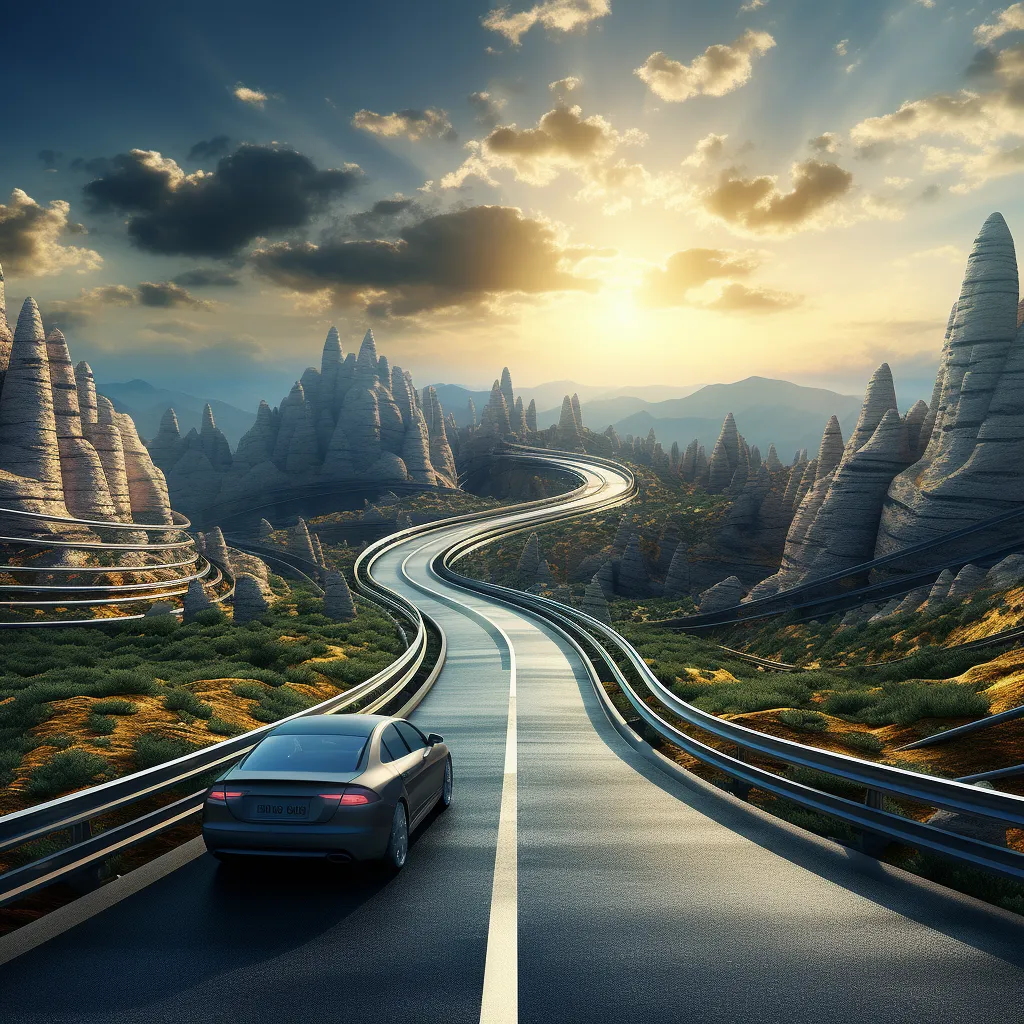

- When training deep learning models, the choice of optimization algorithm is crucial, as it can significantly impact the speed of training and the performance of the final model.

  - *Example:* Imagine you're driving a car, and you want to reach your destination quickly while avoiding obstacles and staying on the road. The optimization algorithm, in this context, is like the steering wheel that helps you navigate and adjust the car's direction and speed to reach your goal efficiently.

- Among the various optimization algorithms available, AdaGrad, Adam, and RMSprop are some of the most popular choices in the field of deep learning.

  - *Example:* These optimization algorithms can be likened to different types of steering mechanisms for your neural network, each with its own unique way of helping the network find the optimal weights that minimize the loss function.

- **AdaGrad:**
  - AdaGrad is like a steering wheel that continuously adjusts based on your car's past turns. If you make frequent left turns, it adapts by making left turns more efficiently.
  - In deep learning, AdaGrad adjusts the learning rate for each parameter individually based on their historical gradients. It helps the model learn more effectively, especially for sparse features.

- **Adam:**
  - Adam is like a steering wheel with adaptive sensitivity. It not only adjusts based on past turns but also incorporates momentum to keep the car moving smoothly.
  - In deep learning, Adam combines the benefits of both AdaGrad and momentum. It adjusts learning rates for parameters and introduces momentum for faster convergence, making it a popular choice for many tasks.

- **RMSprop:**
  - RMSprop is like a steering wheel that focuses on the recent history of your car's turns, giving more importance to the immediate road conditions.
  - In deep learning, RMSprop adapts learning rates based on the gradients' moving average. It helps overcome some of AdaGrad's limitations and is particularly useful when dealing with non-stationary data.

- All these optimization algorithms share a common goal: to guide the neural network towards finding the weights that minimize the loss function efficiently.

  - *Example:* Just as various steering mechanisms aim to get the car to its destination as quickly as possible, these optimizers aim to help the neural network find the optimal weights efficiently to improve the model's performance.

In summary, optimization algorithms like AdaGrad, Adam, and RMSprop play a crucial role in deep learning, acting as the steering wheels that guide neural networks to their optimal solutions while considering various factors such as gradients, learning rates, and momentum, ultimately enhancing the performance of machine learning models.


# Various Optimization Algorithms For Training Neural Networks
# Neural Network Optimization

- The right **optimization algorithm** can reduce training time exponentially.

- **Optimizers** are algorithms or methods used to change the attributes of your neural network, such as weights and learning rate, in order to reduce the losses.

- How you should change your weights or learning rates of your neural network to reduce the losses is defined by the **optimizers** you use.

- **Optimization algorithms** or strategies are responsible for reducing the losses and providing the most accurate results possible.


# Problem Statement: Evaluating the Efficiency of Different Optimizers in Training Neural Networks

## Objective
- Compare the efficiency and performance of three widely used optimization algorithms in training a neural network model.
- Understand how each optimizer influences loss reduction and convergence speed during training on a synthetic binary classification dataset.

## Background
- Optimization algorithms play a crucial role in training neural networks by minimizing the loss function, measuring the difference between predicted and actual outputs.
- Choice of optimizer significantly affects training speed and the model's ability to reach the global minimum of the loss function.

## Dataset Description
- Dataset comprises 100 samples with 5 randomly generated features.
- Target labels are binary (0 or 1), randomly assigned to each sample.

## Model Architecture
- Sequential neural network with a hidden layer of 10 neurons and ReLU activation.
- Output layer with a single neuron using sigmoid activation.
- Chosen for its simplicity and effectiveness in binary classification tasks.

## Optimizers Under Comparison
- **SGD (Stochastic Gradient Descent):**
  - Traditional optimizer with a constant learning rate.

- **Adagrad:**
  - Optimizer that adapts the learning rate to parameters, performing larger updates for infrequent parameters and smaller updates for frequent ones.

- **Adam:**
  - Optimizer that computes adaptive learning rates for each parameter, combining the benefits of Adagrad and adding momentum for faster convergence.

## Evaluation Metrics
- Primary metric: Loss value (binary crossentropy) during training tracked over 10 epochs for each optimizer.
- Focus on loss reduction pattern and convergence rate toward the minimum loss value.

## Expected Outcome
- Experiment aims to highlight differences in loss reduction efficiency and training behavior among SGD, Adagrad, and Adam optimizers.
- Insights from the comparison can guide optimizer selection based on specific machine learning task requirements, such as training speed and data characteristics (e.g., sparsity).

## Implementation Details
- Training for each optimizer conducted without displaying the progress bar (verbose set to 0) for streamlined evaluation.
- After training, loss values across epochs will be plotted in a graph for visual comparison of the three optimizers' performance.


**Imports:**

1. `import numpy as np`: Imports the NumPy library for numerical operations (array creation, mathematical functions).
2. `import tensorflow as tf`: Imports the TensorFlow library for building and training neural networks.
3. `import matplotlib.pyplot as plt`: Imports the Matplotlib library for creating visualizations (the loss plot).

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

**Dataset and Model:**

4. `X = np.random.rand(100, 5)`: Creates a random NumPy array `X` of shape (100, 5) containing values between 0 and 1, representing 100 input data points, each with 5 features.
5. `y = np.random.randint(2, size=100)`: Creates a NumPy array `y` of shape (100,) containing integer values 0 or 1, representing the target labels for the 100 data points.

In [ ]:
# Sample dataset and model
X = np.random.rand(100, 5)  # Input data of random values between 0 and 1
y = np.random.randint(2, size=100)  # Target labels (0 or 1)

6. `model = tf.keras.Sequential(...)`: Creates a sequential Keras model with two layers:
   - Hidden layer with 10 neurons and ReLU activation (applies a rectified linear unit function to neuron outputs, encouraging sparsity).
   - Output layer with 1 neuron and sigmoid activation (squeezes outputs between 0 and 1, suitable for binary classification).

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_dim=5),  # Hidden layer with 10 neurons, ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron, sigmoid activation
])

**Optimizer Training:**

7. `loss_sgd = []`, `loss_adagrad = []`, `loss_adam = []`: Create empty lists to store losses for each optimizer.


In [ ]:
# Lists to store losses for each optimizer
loss_sgd = []
loss_adagrad = []
loss_adam = []

8. `for optimizer_name in ['SGD', 'Adagrad', 'Adam']`: Loop through three optimizer names.
9. `if optimizer_name == 'SGD': ... elif ... else ...`: Based on the `optimizer_name`, create the appropriate TensorFlow optimizer object with a learning rate.
10. `model.compile(...):` Compiles the model with the chosen optimizer

In [ ]:
# Train with different optimizers and track losses
for optimizer_name in ['SGD', 'Adagrad', 'Adam']:
    # Select appropriate optimizer based on name
    if optimizer_name == 'SGD':
        optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
    elif optimizer_name == 'Adagrad':
        optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.02)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)

    # Compile the model with the chosen optimizer and binary crossentropy loss
    model.compile(loss='binary_crossentropy', optimizer=optimizer)

    # Train the model for 10 epochs without displaying training progress
    history = model.fit(X, y, epochs=10, verbose=0)

    # Extract losses from training history for plotting
    loss_values = history.history['loss']
    if optimizer_name == 'SGD':
        loss_sgd = loss_values
    elif optimizer_name == 'Adagrad':
        loss_adagrad = loss_values
    else:
        loss_adam = loss_values

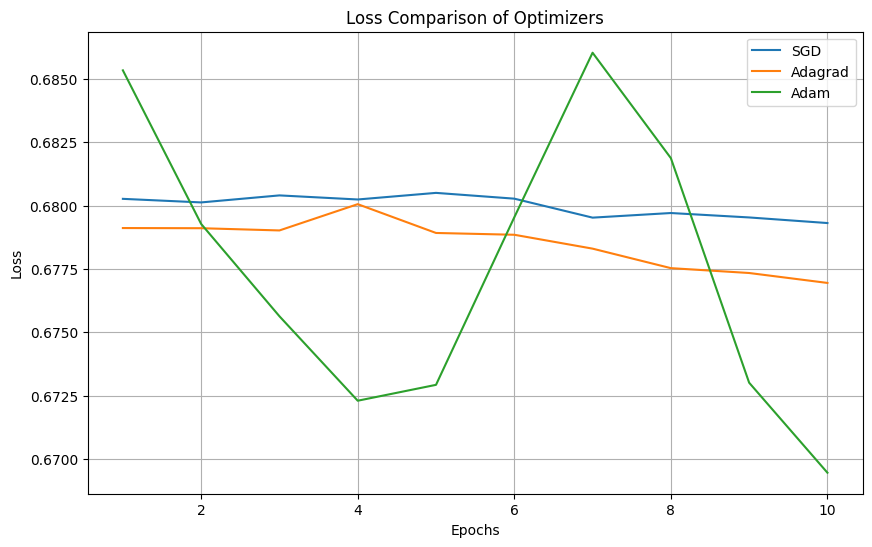

In [ ]:
# Plot losses
epochs = np.arange(1, 11)  # Epochs (1 to 10)
plt.figure(figsize=(10, 6))  # Set plot size
plt.plot(epochs, loss_sgd, label='SGD')
plt.plot(epochs, loss_adagrad, label='Adagrad')
plt.plot(epochs, loss_adam, label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison of Optimizers')
plt.legend()
plt.grid(True)
plt.show()

### Comparison between various optimizers


![Example GIF](https://miro.medium.com/v2/resize:fit:1200/format:webp/1*_osB82GKHBOT8k1idLqiqA.gif)


![Example GIF](https://miro.medium.com/v2/resize:fit:1200/format:webp/1*_osB82GKHBOT8k1idLqiqA.gif)
